In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/Shareddrives/cis545/Data


/content/drive/Shareddrives/cis545/Data


In [3]:
data = pd.read_excel('mainData.xlsx')

EDA 1: Success and failure displayed over various countries.

With this visualization, we want to see the geographic location of a startup's headquarters may have influenced its chances of success/failure. While correlation does not imply causation, understanding and visualizing this relationship helps provide insights into the potential governmental, economic, political, or social circumstances that allow startups and VC in certain countries to thrive.

In [21]:
#aggregate by company_id
eda1 = data[['company_id', 'name', 'success', 'country_state']]
eda1 = eda1.drop_duplicates()
#This ensures that we are removing only na values from the country_state column and not additional rows
print(eda1.country_state.isna().sum())
print(eda1.shape)
eda1 = eda1.dropna()
print(eda1.shape)

#reformat to look specifically at countries only keep first three characters
eda1['country_state'] = eda1['country_state'].apply(lambda x: x[0:3])
countries = eda1.groupby('country_state').mean().reset_index(drop = False)
countries = countries.sort_values('success', ascending = False)
#to get a better absolute sense, also use:
countries2 = eda1.groupby('country_state').sum().reset_index(drop = False)
countries2 = countries2.sort_values('success', ascending = False)

24760
(91227, 4)
(66467, 4)


<ipython-input-21-e996e6b11d9f>:12: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-21-e996e6b11d9f>:15: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [23]:
import plotly.express as px

fig = px.choropleth(countries, locations="country_state",
                    color="success",
                    hover_name="country_state", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.RdBu,
                    title = "Startup success rate by country")

fig.show()

In [32]:
countries = countries[countries.country_state != 'NCL']
fig = px.choropleth(countries, locations="country_state",
                    color="success",
                    hover_name="country_state", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Greens,
                    title = "Startup success rate by country (extremes removed)")

fig.show()

In [27]:
fig2 = px.choropleth(countries2, locations="country_state",
                    color="success",
                    hover_name="country_state", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Reds,
                    title = "Startup success total count by country")

fig2.show()

To compensate for overdominance of U.S. reporting, we will try removing the US from the dataset and replot the data

In [26]:
countries2 = countries2[countries2.country_state != 'USA']
fig2 = px.choropleth(countries2, locations="country_state",
                    color="success",
                    hover_name="country_state", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Reds,
                    title = "Startup success total count (USA removed)")

fig2.show()

Having used some geographic analysis which is not super useful due to presence of outliers, we can also do some traditional more quantative graphing with boxplots

Text(0.5, 1.0, 'Box plot of startup success rates by country')

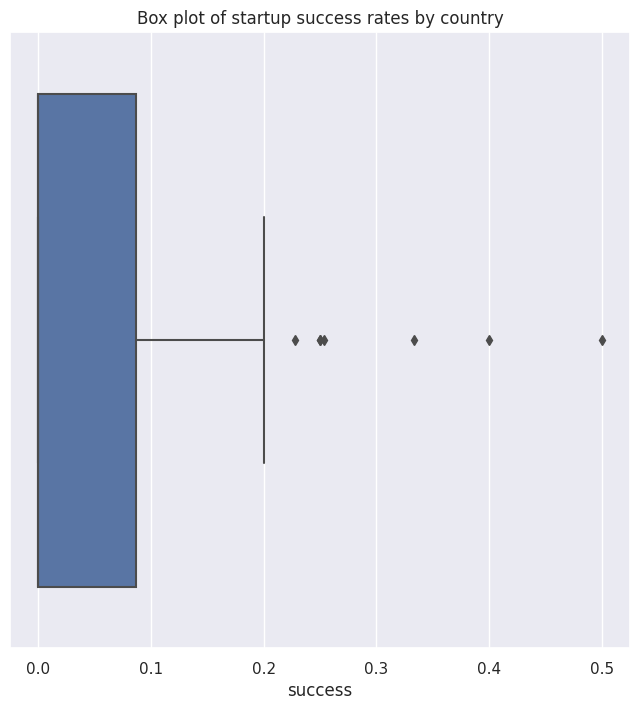

In [33]:
import seaborn as sns
sns.boxplot(x=countries["success"]).set_title('Box plot of startup success rates by country (extremes removed)')

Text(0.5, 1.0, 'Box plot of number of successful startups by country')

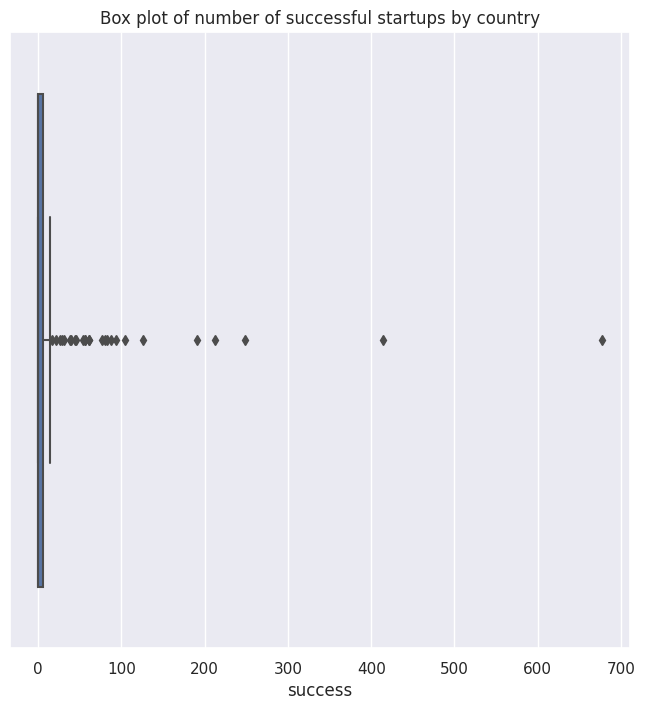

In [34]:
sns.boxplot(x=countries2['success']).set_title('Box plot of number of successful startups by country (USA removed)')

Given the presence of outliers in both attempts to visualize data, we will try to just use a visualization on US states instead

In [10]:
#aggregate by company_id
eda2 = data[['company_id', 'name', 'success', 'country_state']]
eda2 = eda2.drop_duplicates()
eda2 = eda2.dropna()

#reformat to look specifically at countries only keep first three characters
eda2['country_state'] = eda2['country_state'].apply(lambda x: x[3:5] if x[0:3] == "USA" else '')
eda2 = eda2[eda2.country_state != '']
states = eda2.groupby('country_state').mean().reset_index(drop = False)
states = states.sort_values('success', ascending = False)
#to get a better absolute sense, also use:
states2 = eda2.groupby('country_state').sum().reset_index(drop = False)
states2 = states2.sort_values('success', ascending = False)

<ipython-input-10-9c65c88f1b8b>:9: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-10-9c65c88f1b8b>:12: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [35]:
fig = px.choropleth(states, locations = 'country_state',
                    locationmode="USA-states",
                    color = 'success',
                    hover_name = 'country_state',
                    scope = 'usa',
                    color_continuous_scale=px.colors.sequential.Blues,
                    title = "Startup success rate by state")
fig.show()

In [36]:
fig = px.choropleth(states2, locations = 'country_state',
                    locationmode="USA-states",
                    color = 'success',
                    hover_name = 'country_state',
                    scope = 'usa',
                    color_continuous_scale=px.colors.sequential.Turbo,
                    title = "Number of successful startups per state")
fig.show()

Next, we'd like to investigate some characteristics of startups and their sectors. That is, which sectors had the highest number of startups (proportionally speaking), highest rate of success, most amount of funding, etc.)

After some testing, pie charts don't really work due to the higher number of possible categories. Therefore, we have to use some other kind of visualization mechanism (the labels for pie charts don't show up well)

In [13]:
eda3 = data[['company_id', 'name', 'category_code', 'funding_total_usd', 'success']]
eda3 = eda3.drop_duplicates()

sectors = eda3.groupby('category_code')['funding_total_usd'].sum().reset_index(drop = False)
secSuccess = eda3.groupby('category_code')['success'].mean().reset_index(drop = False)
sectors = sectors.merge(secSuccess)

sectors.head()

,category_code,funding_total_usd,success
0,advertising,11722619928,0.137003
1,analytics,6344398077,0.404930
2,automotive,3534699857,0.208589
3,biotech,46964233814,0.465301
4,cleantech,26933431603,0.318103


In [39]:
"""import matplotlib.pyplot as plt
palette_color = sns.color_palette('bright')
plt.pie(sectors.success, labels = sectors.category_code, colors = palette_color, autopct = '%.0f%%')
plt.show()"""

#use figData for a more comprehensive figure but will lag out really bad
figData = eda3[eda3.funding_total_usd > 0]

fig = px.treemap(sectors, path = [px.Constant('all'), 'category_code'],#, 'name'],
                 values = 'funding_total_usd',
                 color = 'success',
                 color_continuous_scale='Greens',
                 title = "Startup industry funding, colored by success rate")
fig.show()

More simply, we can also look purely at the number of startups on a sector basis as well

Text(0, 0.5, 'Number of Startups')

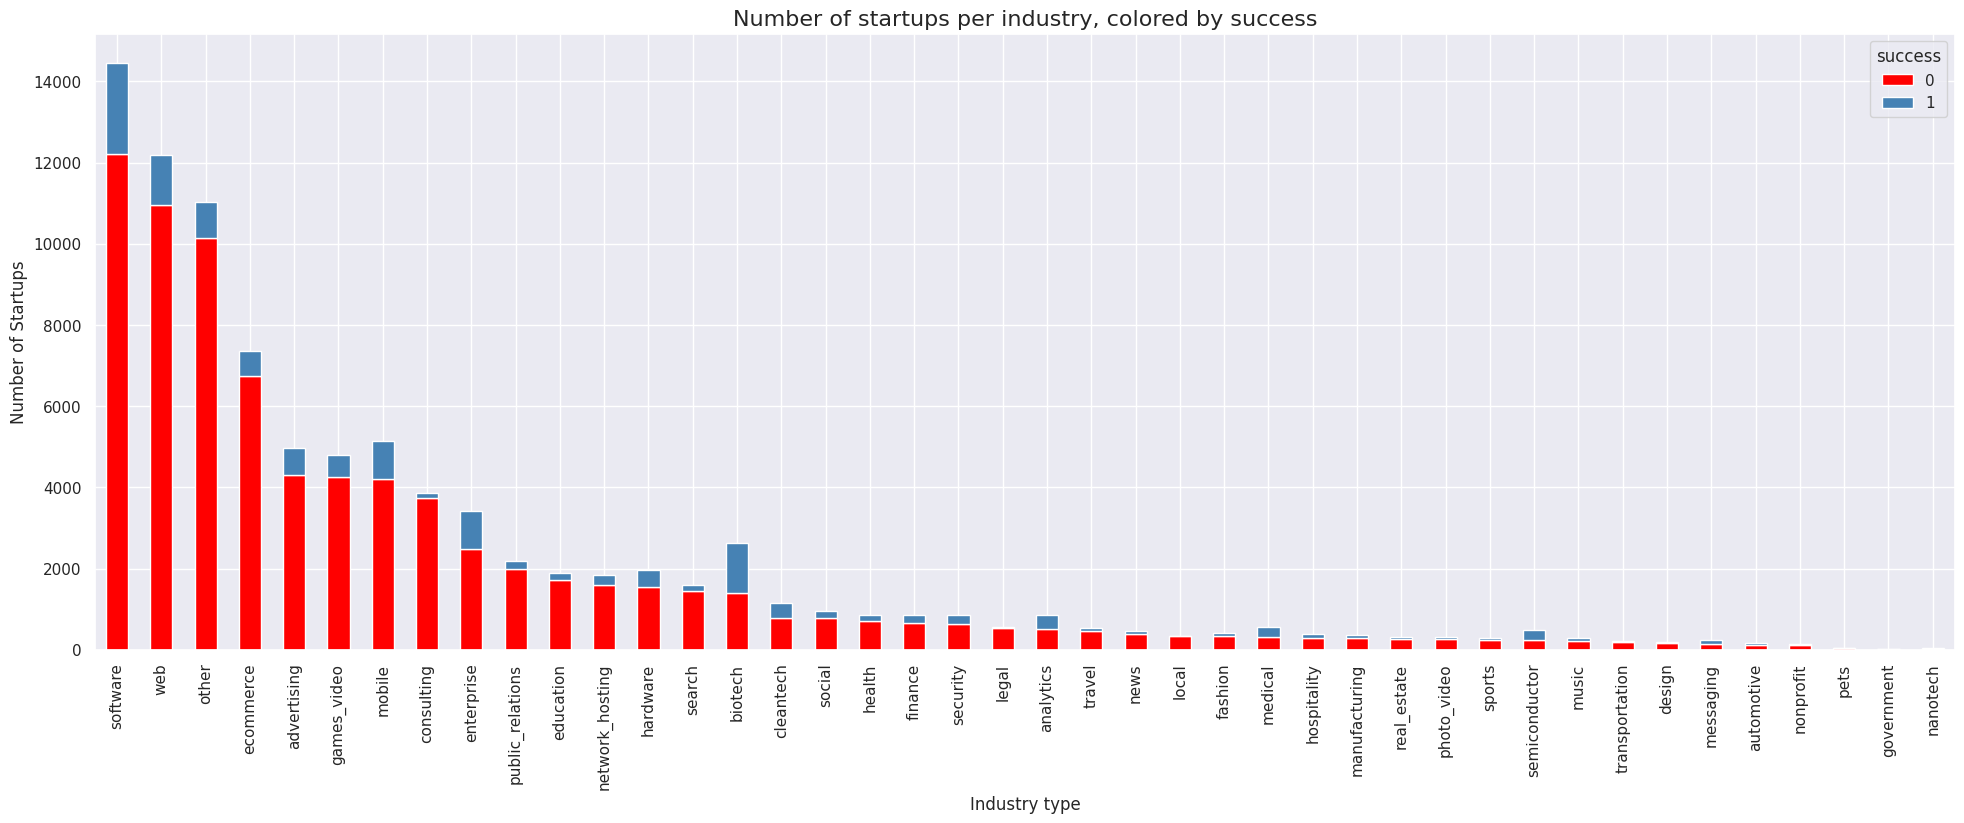

In [61]:
import matplotlib.pyplot as plt

secBar = eda3.groupby(['category_code', 'success'])['name'].count().reset_index()
secBar = secBar.pivot(index = 'category_code', columns = 'success', values = 'name').reset_index()
secBar = secBar.sort_values(0, ascending = False).reset_index(drop = True)
secBar = secBar.rename(columns = {2: 'Failure', 3: 'Success'})

#set seaborn plotting aesthetics
sns.set(style='white')
sns.set(rc={"figure.figsize":(24, 8)})

#create stacked bar chart
secBar.set_index('category_code').plot(kind='bar', stacked=True, color=['red', 'steelblue'])
#add overall title
plt.title('Number of startups per industry, colored by success', fontsize=16)

#add axis titles
plt.xlabel('Industry type')
plt.ylabel('Number of Startups')

Next, we want to look at the relationship between funding, rounds, and company success for the subset of startups which received funding of some sort. That is, how does a company's total amount of funding relate to the number of rounds of funding it received (this should be a strong positive correlation) and in turn to the success and failure thereof of those companies?

In [16]:
eda4 = data[['company_id', 'name', 'category_code', 'country_state', 'funding_total_usd', 'funding_rounds', 'success']]
eda4 = eda4.drop_duplicates()
eda4 = eda4.dropna(subset = 'country_state')
eda4['country_state'] = eda4['country_state'].apply(lambda x: x[0:3])
eda4 = eda4[eda4.funding_total_usd > 0]

[Text(0.5, 1.0, 'Rounds of funding by total amount raised, colored by success'),
 Text(0.5, 0, 'Number of rounds of funding'),
 Text(0, 0.5, 'Total amount raised (USD)')]

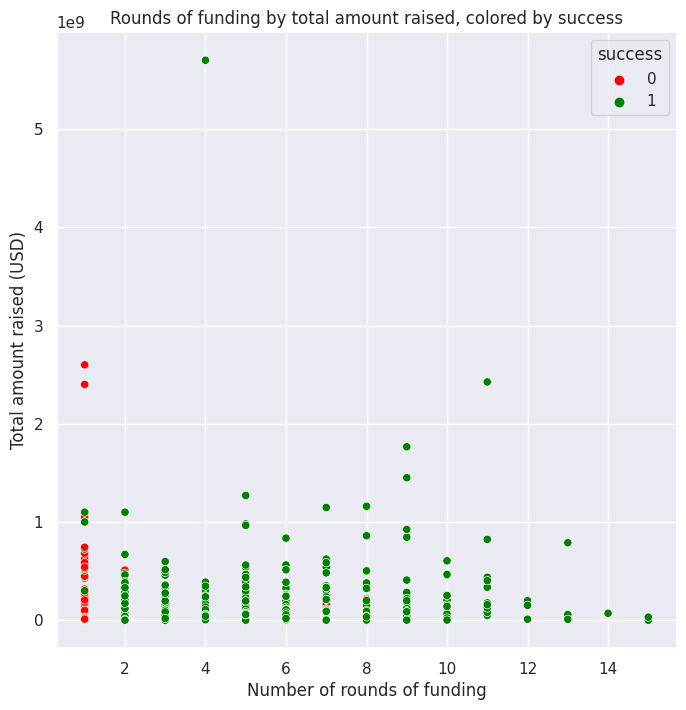

In [55]:
palette = {1: "green",
           0: "red"}
sns.set(rc={"figure.figsize":(8, 8)})
ax = sns.scatterplot(data = eda4, x = "funding_rounds", y = "funding_total_usd", hue = "success", palette = palette)
ax.set(title = "Rounds of funding by total amount raised, colored by success",
       xlabel = 'Number of rounds of funding',
       ylabel = 'Total amount raised (USD)')
#TODO: add better labels, legend, title, etc. (aesthetics)

[Text(0.5, 1.0, 'Rounds of funding by total amount raised, colored by success (US startups)'),
 Text(0.5, 0, 'Number of rounds of funding'),
 Text(0, 0.5, 'Total amount raised (USD)')]

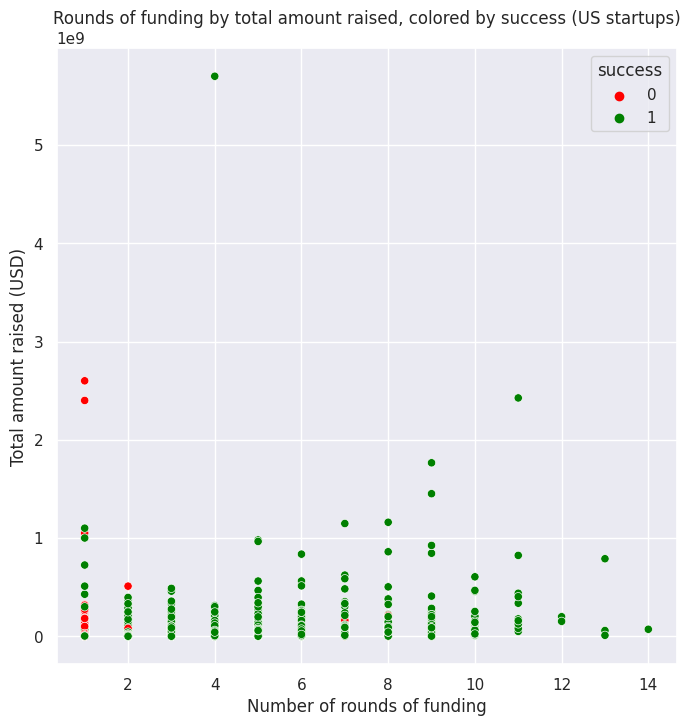

In [56]:
usaeda4 = eda4[eda4.country_state == 'USA']
ax = sns.scatterplot(data = usaeda4, x = "funding_rounds", y = "funding_total_usd", hue = "success", palette = palette)
ax.set(title = "Rounds of funding by total amount raised, colored by success (US startups)",
       xlabel = 'Number of rounds of funding',
       ylabel = 'Total amount raised (USD)')

EDA5: We want to look into the status field a bit more, and observe how the status field interplays into various other characteristics of our dataset

Text(0, 0.5, 'Number of Startups')

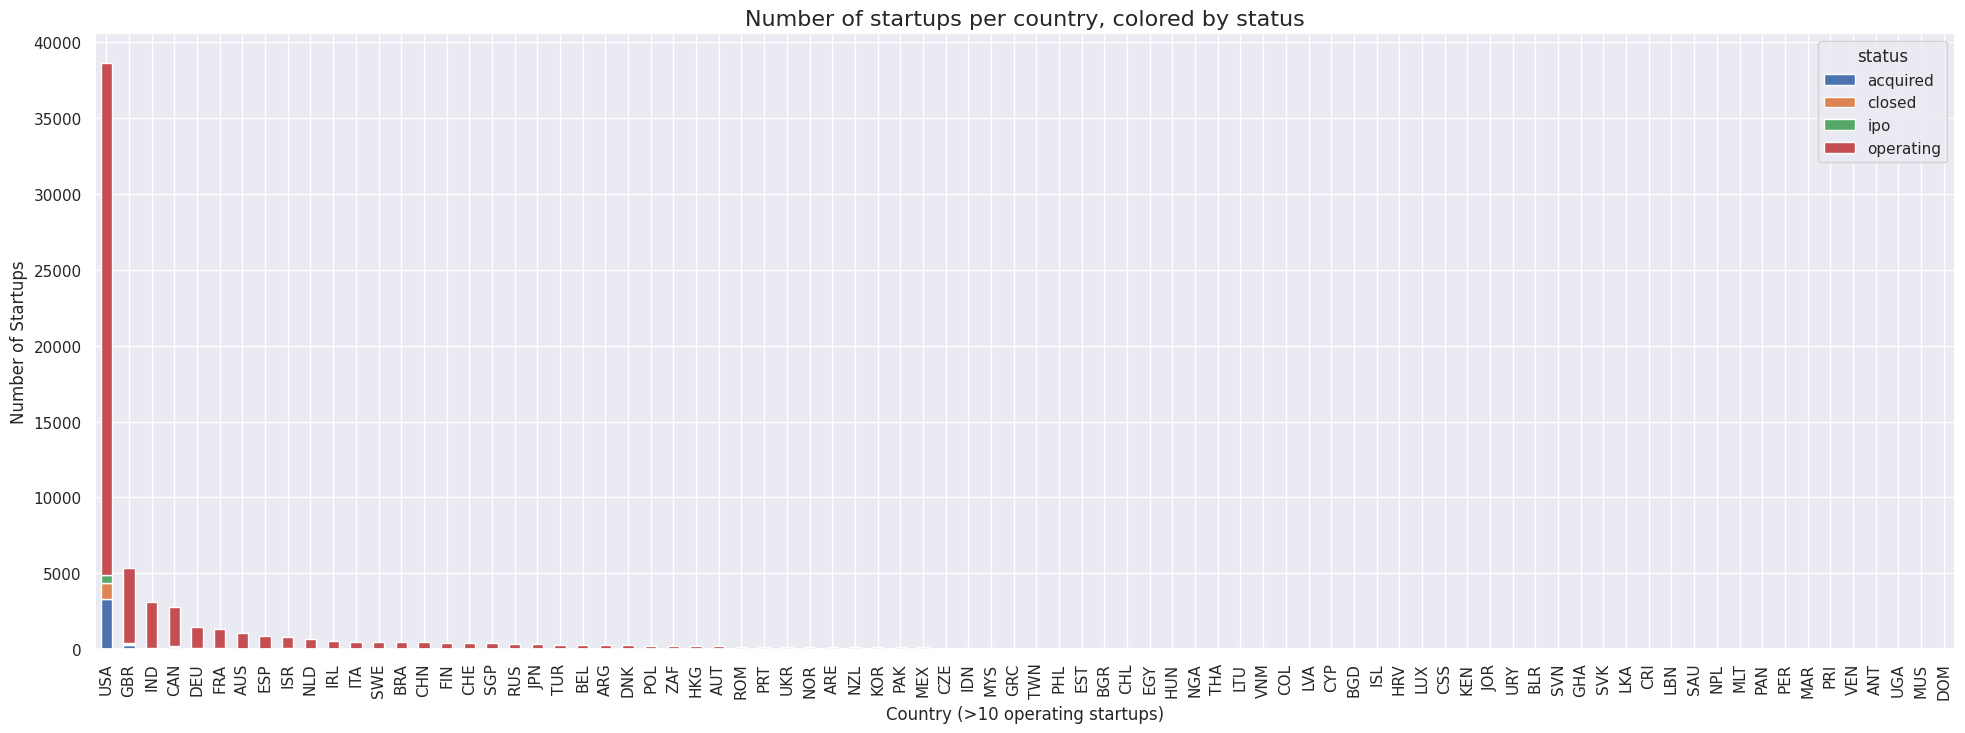

In [71]:
eda5 = data[['company_id', 'name', 'status', 'country_state', 'success']]
eda5 = eda5.drop_duplicates()
eda5 = eda5.dropna(subset = 'country_state')
eda5['country_state'] = eda5['country_state'].apply(lambda x: x[0:3])

opBar = eda5.groupby(['country_state', 'status'])['name'].count().reset_index()
opBar = opBar.pivot(index = 'country_state', columns = 'status', values = 'name').reset_index()
opBar = opBar.sort_values('operating', ascending = False).reset_index(drop = True)

#need to filter because otherwise plot is unreadable
opBar = opBar[opBar.operating > 10]

#set seaborn plotting aesthetics
sns.set(style='white')
sns.set(rc={"figure.figsize":(24, 8)})

#create stacked bar chart
opBar.set_index('country_state').plot(kind='bar', stacked=True)
#add overall title
plt.title('Number of startups per country, colored by status', fontsize=16)

#add axis titles
plt.xlabel('Country (>10 operating startups)')
plt.ylabel('Number of Startups')

Text(0, 0.5, 'Number of Startups')

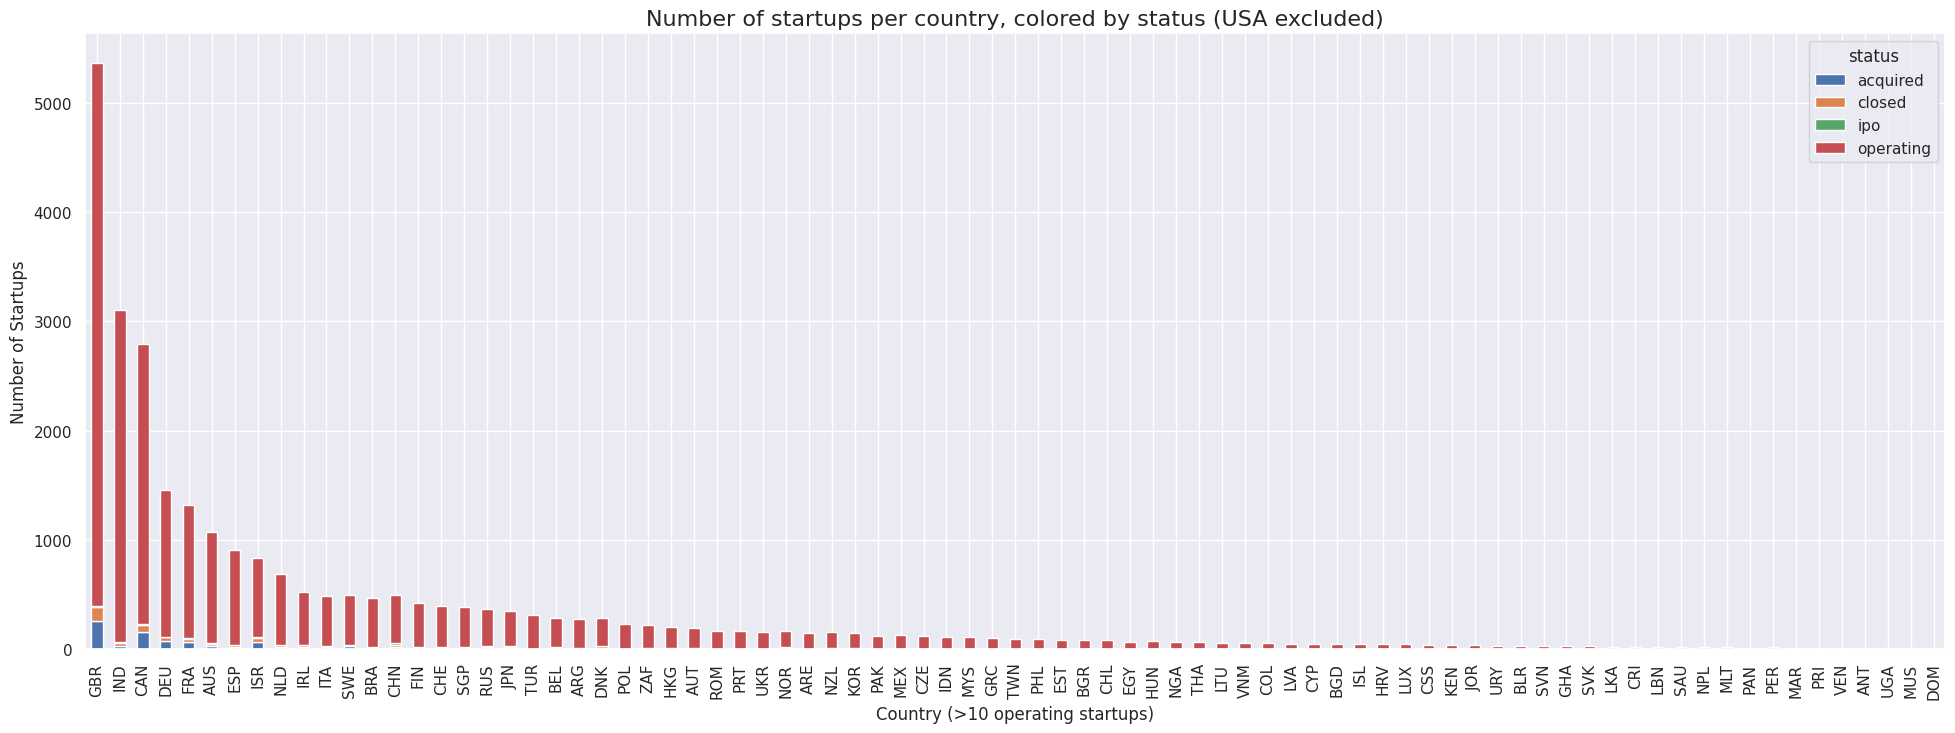

In [72]:
opBar2 = opBar[opBar.country_state != 'USA']
#create stacked bar chart
opBar2.set_index('country_state').plot(kind='bar', stacked=True)
#add overall title
plt.title('Number of startups per country, colored by status (USA excluded)', fontsize=16)

#add axis titles
plt.xlabel('Country (>10 operating startups)')
plt.ylabel('Number of Startups')

Some additional EDA ideas (not yet executed on, review during project check-in with Arnav)

*   Companies over time -- bar plot with x-axis as time and colored by status or success/failure

*   Visualizing relationship between relationships and company status (not sure what kind of plot is best here)

*   Relationship between degree subject and company success (maybe a colored bar chart, but don't want too many duplicate chart styles)

